In [45]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc

plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    path ='C:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Can't find your system.")

In [46]:
data=pd.read_csv('가구원수별_가구_일반가구___읍면동_2015___시군구_2016__20210320160717.csv',encoding='cp949',header=1)
jeonguk=data[data['행정구역별(읍면동)']=='전국']
list_index_oul=list(jeonguk.T.index[2:])#1인가구~~7인이상
value_pop_oul=list(jeonguk.T.iloc[2:][0])#그들의 값

In [10]:
data=pd.read_csv('가구원수별_가구_일반가구___읍면동_2015___시군구_2016__20210320160717.csv',encoding='cp949',header=1)


In [12]:
data

,행정구역별(읍면동),일반가구_계,1인,2인,3인,4인,5인,6인,7인 이상
0,전국,20343188,6147516,5663330,4217736,3300114,801048,166866,46578
1,읍부,1937519,563446,573991,390046,301488,83859,18831,5858
2,면부,1968717,686531,711332,312768,175464,58445,17324,6853
3,동부,16436952,4897539,4378007,3514922,2823162,658744,130711,33867
4,서울특별시,3896389,1299787,1005065,801819,614026,138596,29336,7760
5,부산광역시,1377030,423227,400961,286644,208618,45849,9348,2383
6,대구광역시,968620,284416,267961,207953,163754,35926,6983,1627
7,인천광역시,1120576,297865,305688,253332,203577,47920,9663,2531
8,광주광역시,587159,182364,156984,117401,98248,26302,4676,1184
9,대전광역시,609043,205165,158832,119508,96271,23465,4623,1179


In [47]:
sejong=data[data['행정구역별(읍면동)']=='세종특별자치시']
sejong=sejong.T
list_index_jong=list(sejong.index[2:])
value_pop_jong=list(sejong.iloc[2:][11])

In [ ]:
colors = sns.color_palette('hls',len(df['가구']))
fig = plt.figure(figsize=(7,7))
fig.set_facecolor('white')
ax = fig.add_subplot()
pie = ax.pie(df['비율'], startangle=90, colors=colors, autopct='%1.1f%%')
plt.legend(pie[0],df['가구'],bbox_to_anchor=(1, 0.9))
plt.title('2019년 전국 가구원 수 비율',fontsize=20)
plt.show()

In [39]:
len(value_pop)

7

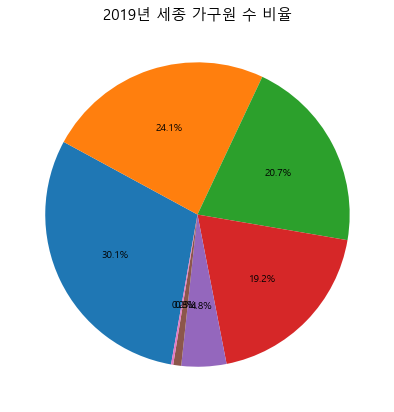

In [38]:
colors = sns.color_palette('hls',len(value_pop))
fig = plt.figure(figsize=(7,7))
fig.set_facecolor('white')
ax = fig.add_subplot()
plt.pie(value_pop, autopct='%1.1f%%', startangle=260, counterclock=False)
plt.title('2019년 세종 가구원 수 비율',fontsize=15)
plt.show()

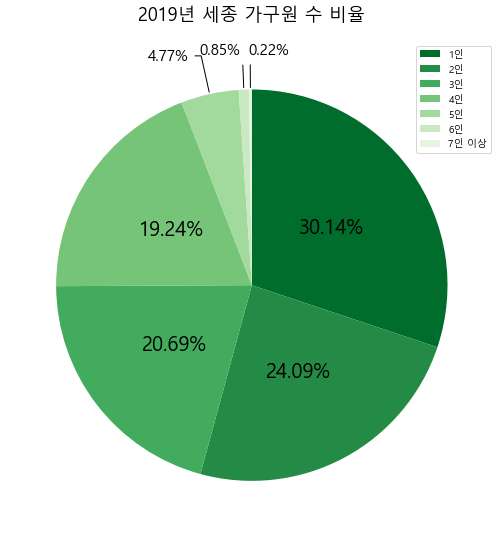

In [83]:
colors = sns.color_palette('Greens_r',len(list_index_jong))
labels = list_index_jong ## 라벨
frequency = value_pop_jong## 빈도
fig = plt.figure(figsize=(9,9)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성
pie = ax.pie(frequency, ## 파이차트 출력
        startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계 방향으로 그린다.
       #autopct=lambda p : '{:.2f}%'.format(p), ## 퍼센티지 출력
       colors = colors,#['bisque','lightgreen','powderblue','lightsteelblue','plum','mistyrose','salmon'], ## 색상 지정
        explode = [0,0,0,0,0,0,0])
total = np.sum(frequency) ## 빈도수 합
threshold = 5 ## 상한선 비율
sum_pct = 0 ## 퍼센티지
bbox_props = dict(boxstyle='square',fc='w',ec='w',alpha=0) ## annotation 박스 스타일
## annotation 설정
config = dict(arrowprops=dict(arrowstyle='-'),bbox=bbox_props,va='center')
for i,l in enumerate(labels):
    ang1, ang2 = ax.patches[i].theta1, ax.patches[i].theta2 ## 파이의 시작 각도와 끝 각도
    center, r = ax.patches[i].center, ax.patches[i].r ## 원의 중심 좌표와 반지름길이
    if i < len(labels) - 1:
        sum_pct += float(f'{frequency[i]/total*100:.2f}')
        text = f'{frequency[i]/total*100:.2f}%'
    else: ## 마지막 파이 조각은 퍼센티지의 합이 100이 되도록 비율을 조절
        text = f'{100-sum_pct:.2f}%'
    ## 비율 상한선보다 작은 것들은 Annotation으로 만든다.
    if frequency[i]/total*100 < threshold and i < len(labels) - 1:#마지막값이 아님
        ang = (ang1+ang2)/2 ## 중심각
        x = np.cos(np.deg2rad(ang)) ## Annotation의 끝점에 해당하는 x좌표
        y = np.sin(np.deg2rad(ang)) ## Annotation의 끝점에 해당하는 y좌표
        ## x좌표가 양수이면 즉 y축을 중심으로 오른쪽에 있으면 왼쪽 정렬
        ## x좌표가 음수이면 즉 y축을 중심으로 왼쪽에 있으면 오른쪽 정렬
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang) ## 시작점과 끝점 연결 스타일
        config["arrowprops"].update({"connectionstyle": connectionstyle}) ## 
        ax.annotate(text, xy=(x, y), xytext=(1.5*x, 1.2*y),
                    horizontalalignment=horizontalalignment, **config, fontsize=15)
    elif frequency[i]/total*100 < threshold and i >= len(labels) - 1:#마지막
        ang = (ang1+ang2)/2 ## 중심각
        x = np.cos(np.deg2rad(ang)) ## Annotation의 끝점에 해당하는 x좌표
        y = np.sin(np.deg2rad(ang)) ## Annotation의 끝점에 해당하는 y좌표
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang) ## 시작점과 끝점 연결 스타일
        config["arrowprops"].update({"connectionstyle": connectionstyle}) ## 
        ax.annotate(text, xy=(x, y), xytext=(1.5*x+0.2, 1.2*y),
                    horizontalalignment=horizontalalignment, **config, fontsize=15)
    else:
        x = (r/2)*np.cos(np.pi/180*((ang1+ang2)/2)) + center[0] ## 텍스트 x좌표
        y = (r/2)*np.sin(np.pi/180*((ang1+ang2)/2)) + center[1] ## 텍스트 y좌표
        ax.text(x,y,text,ha='center',va='center',fontsize=20)
plt.title('2019년 세종 가구원 수 비율', fontsize=18,pad=20)
plt.legend(labels,loc='upper right') ## 범례 표시
plt.savefig('2019년 세종 가구원 수 비율'+'.png')
plt.show()

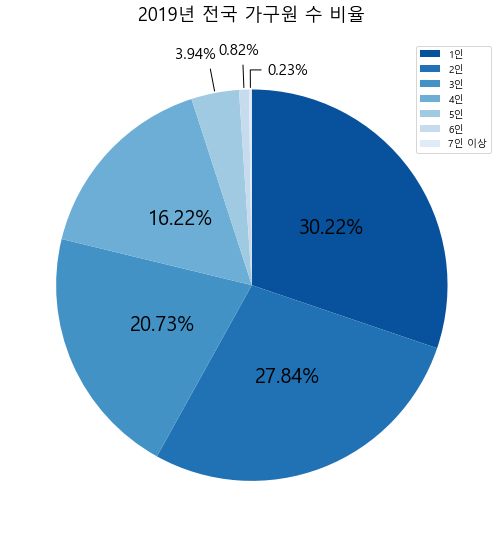

In [82]:
colors = sns.color_palette('Blues_r',len(value_pop_oul))
labels = list_index_oul ## 라벨
frequency = value_pop_oul## 빈도
fig = plt.figure(figsize=(9,9)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성
pie = ax.pie(frequency, ## 파이차트 출력
        startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계 방향으로 그린다.
       #autopct=lambda p : '{:.2f}%'.format(p), ## 퍼센티지 출력
       colors = colors,#['bisque','lightgreen','powderblue','lightsteelblue','plum','mistyrose','salmon'], ## 색상 지정
        explode = [0,0,0,0,0,0,0])
total = np.sum(frequency) ## 빈도수 합
threshold = 5 ## 상한선 비율
sum_pct = 0 ## 퍼센티지
bbox_props = dict(boxstyle='square',fc='w',ec='w',alpha=0) ## annotation 박스 스타일
## annotation 설정
config = dict(arrowprops=dict(arrowstyle='-'),bbox=bbox_props,va='center')
for i,l in enumerate(labels):
    ang1, ang2 = ax.patches[i].theta1, ax.patches[i].theta2 ## 파이의 시작 각도와 끝 각도
    center, r = ax.patches[i].center, ax.patches[i].r ## 원의 중심 좌표와 반지름길이
    if i < len(labels) - 1:
        sum_pct += float(f'{frequency[i]/total*100:.2f}')
        text = f'{frequency[i]/total*100:.2f}%'
    else: ## 마지막 파이 조각은 퍼센티지의 합이 100이 되도록 비율을 조절
        text = f'{100-sum_pct:.2f}%'
    ## 비율 상한선보다 작은 것들은 Annotation으로 만든다.
    if frequency[i]/total*100 < threshold and i < len(labels) - 1:#마지막값이 아님
        ang = (ang1+ang2)/2 ## 중심각
        x = np.cos(np.deg2rad(ang)) ## Annotation의 끝점에 해당하는 x좌표
        y = np.sin(np.deg2rad(ang)) ## Annotation의 끝점에 해당하는 y좌표
        ## x좌표가 양수이면 즉 y축을 중심으로 오른쪽에 있으면 왼쪽 정렬
        ## x좌표가 음수이면 즉 y축을 중심으로 왼쪽에 있으면 오른쪽 정렬
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang) ## 시작점과 끝점 연결 스타일
        config["arrowprops"].update({"connectionstyle": connectionstyle}) ## 
        ax.annotate(text, xy=(x, y), xytext=(1.5*x+0.1, 1.2*y),
                    horizontalalignment=horizontalalignment, **config, fontsize=15)
    elif frequency[i]/total*100 < threshold and i >= len(labels) - 1:#마지막
        ang = (ang1+ang2)/2 ## 중심각
        x = np.cos(np.deg2rad(ang)) ## Annotation의 끝점에 해당하는 x좌표
        y = np.sin(np.deg2rad(ang)) ## Annotation의 끝점에 해당하는 y좌표
        ## x좌표가 양수이면 즉 y축을 중심으로 오른쪽에 있으면 왼쪽 정렬
        ## x좌표가 음수이면 즉 y축을 중심으로 왼쪽에 있으면 오른쪽 정렬
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang) ## 시작점과 끝점 연결 스타일
        config["arrowprops"].update({"connectionstyle": connectionstyle}) ## 
        ax.annotate(text, xy=(x, y), xytext=(1.5*x+0.3, 1.2*y-0.1),
                    horizontalalignment=horizontalalignment, **config, fontsize=15)
    else:
        x = (r/2)*np.cos(np.pi/180*((ang1+ang2)/2)) + center[0] ## 텍스트 x좌표
        y = (r/2)*np.sin(np.pi/180*((ang1+ang2)/2)) + center[1] ## 텍스트 y좌표
        ax.text(x,y,text,ha='center',va='center',fontsize=20)
plt.title('2019년 전국 가구원 수 비율', fontsize=18,pad=20)
plt.legend(labels,loc='upper right') ## 범례 표시
plt.savefig('2019년 전국 가구원 수 비율'+'.png')
plt.show()

In [15]:
list_index=list(sejong.T.index[2:])#1인가구~~7인이상
value_pop=list(sejong.T.iloc[2:])#그들의 값
value_pop

[11]

In [ ]:
#퍼센트가 필요하다면
for i in range(2,9):
    print((int(jeonguk.T.iloc[i][0])/int(jeonguk.T.iloc[1][0]))*100)